# cifar 데이터셋 분류기

이번엔 손글씨가 아니라 화질구지가 머물고 지나간 사진에 대해서 분류를 하는 작업을 해보도록 할게요

비행기 새 자동차 고양이 멍뭉이 등 이 찍혀있는 사진인데 해상도가 32 x 32 x 3 입니다

In [1]:
from keras.utils import to_categorical
from keras.datasets import cifar10

(x, y), (x_test, y_test) = cifar10.load_data()
x = x / 255
x_test = x_test / 255
y = to_categorical(y, 10)
y_test = to_categorical(y_test, 10)


Using TensorFlow backend.


170500096/170498071 [==============================] - 33s 0us/step


정확성을 위해서 레이어를 많이 추가한 모습인데요

총 파라미터의 수가 천 오백만개 정도 됩니다

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(64, 3, padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, 3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D())

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(MaxPool2D())

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.compile('adam', 'categorical_crossentropy', ['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_

In [3]:
history = model.fit(x, y, 1000, 10, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 59s 1ms/step - loss: 1.5944 - acc: 0.4131 - val_loss: 2.5477 - val_acc: 0.3660
Epoch 2/10
50000/50000 [==============================] - 44s 883us/step - loss: 1.0478 - acc: 0.6200 - val_loss: 2.4159 - val_acc: 0.3884
Epoch 3/10
50000/50000 [==============================] - 44s 884us/step - loss: 0.7965 - acc: 0.7151 - val_loss: 2.9164 - val_acc: 0.3458
Epoch 4/10
50000/50000 [==============================] - 44s 881us/step - loss: 0.6258 - acc: 0.7782 - val_loss: 1.3038 - val_acc: 0.6029
Epoch 5/10
50000/50000 [==============================] - 44s 883us/step - loss: 0.4886 - acc: 0.8302 - val_loss: 2.0475 - val_acc: 0.5430
Epoch 6/10
50000/50000 [==============================] - 44s 883us/step - loss: 0.3888 - acc: 0.8638 - val_loss: 1.5697 - val_acc: 0.6092
Epoch 7/10
50000/50000 [==============================] - 44s 884us/st

예측: 고양이


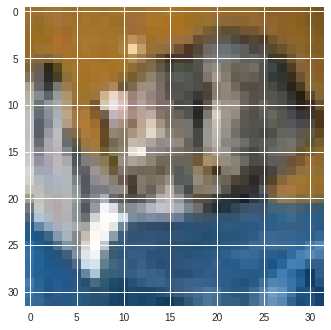

In [4]:
import matplotlib.pyplot as plt
import numpy as np

index2name = {
    0: '비행기',
    1: '작은차',
    2: '새',
    3: '고양이',
    4: '사슴',
    5: '멍뭉이',
    6: '개구리',
    7: '말',
    8: '타는배',
    9: '큰차'
}

which_file = 0
x_show = x_test.reshape(-1, 32, 32, 3)
predict = model.predict(x_show[which_file:which_file+1])

class_index = np.argmax(predict[0])
class_name = index2name[class_index]

print('예측:', class_name)
plt.imshow(x_show[which_file])
plt.show()
